# Árboles de Decisión (Python)
---

<img src='../Imagenes/arbol.png' style='width:15%;height:15%;float:left;margin-right:20px'>
Los árboles de decisión son una de las técnicas más empleadas para el aprendizaje inductivo, siendo un método bastante robusto frente a datos ruidosos. En esencia como todos los regresores, son una función que dará salida a unas entradas. La representación de esta función toma dorma de árbol y es interpretada como una **serie de condiciones consecutivas** que pueden ser fácilmente mapeadas a reglas.

Exiten diferentes algoritmos para la creación de los árboles, en función del método de selección de atributos. Los métodos de seleción de atributos más comunes son: el Índice de Gini, la Ganancia de Información y la Proporción de Ganancia.

El resultado final será un árbol que empieza en un nodo raíz y termina en los nodos hojas. Los caminos desde el nodo raíz a cada uno de los nodos hojas son las ramas, que no son más que secuencias de reglas encadenadas. El resultado de haber llegado a un nodo hoja implica que se han cumplido una por una todas las condiciones en cada una de las ramificaciones de cada nodo intermedio.


## Escenario del problema
---

<img src='../Imagenes/entrevista.png' style='width:8%;height:8%;float:left;margin-right:20px'>
Vamos a contratar un nuevo empleado. Nos ha dicho que en su anterior empresa fue Manager Regional durante 2 años y que cobraba 170.000€ al año. Queremos determinar hasta que punto nos dice la verdad para poder negociar con él el salario que queremos ofrecerle en su nuevo puesto.  
¡Vamos a ello!

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Importar datos
datos = pd.read_csv('../Datos/4.1.Salarios2.csv')
datos.head(10)

,Posicion,Nivel,Salario
0,Analista,1,45000
1,Consultor Junior,2,50000
2,Consultor Senior,3,60000
3,Manager,4,80000
4,Manager General,5,110000
5,Manager Regional,6,150000
6,Socio,7,200000
7,Socio Senior,8,300000
8,Nivel-C,9,500000
9,CEO,10,1000000


In [3]:
# 3. Crear variable y respuesta
X = datos['Nivel'].values.reshape(-1,1)
y = datos['Salario'].values

In [ ]:
# 4. Separar en Entranamiento y Validación
'''
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.3, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)
'''

In [ ]:
# 5. Escalar los datos
'''
escaladorX = MinMaxScaler()
X = escaladorX.fit_transform(X).reshape(-1,1)

escaladorY = MinMaxScaler()
y = escaladorY.fit_transform(y.reshape(-1,1)) # Si ponemos (-1,1) aquí, el SVR se quejará
'''

In [4]:
# 6. Ajustar el Modelo
from sklearn.tree import DecisionTreeRegressor as Arbol
'''
criterion: el criterio que se va a adoptar para ejecutar la división en cada nodo de la rama
'''
regresor = Arbol(criterion='mse', random_state=0)
regresor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [5]:
# 7. Hacer las predicciones (predicciones -> y_pred)
y_fit = regresor.predict(X).reshape(-1,1) # Valores ajustados durante el entrenamiento
y_pred = regresor.predict(6.5).reshape(1,1)  # Valores resultantes con la nueva información

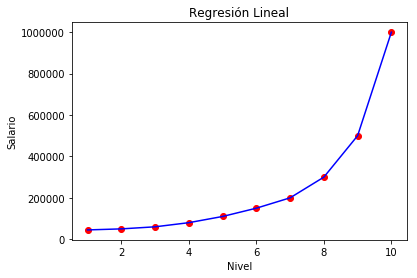

Para un nivel 6.5 cobraría  [[ 150000.]]


In [6]:
# 8. Echemos un vistazo a la pinta que tienen nuestros ajustes
plt.scatter(X, y, color = 'red')
plt.plot(X, y_fit, color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()
print('Para un nivel 6.5 cobraría ', y_pred)

**¡Cuidado, esto es una trampa!**  
¿Qué es lo que está pasando aquí? ¿Creéis que estamos prediciendo perfecto lo que pasa? Está claro que no.  

Lo que pasa es que si estamos en 1 dimensión unicamente (Salario depende del Nivel únicamente) el árbol de decisión está haciendo una división por cada punto y esta tomando la media que hay entre cada valor. Pero entonces, ¿por qué vemos esto y no vemos una escalera, con un escalón por cada división? Eso sería lo lógico, puesto que tomará el valor medio para todos el rango x que componga ese escalón.  

La clave está en la resolución de nuestro gráfico. Nos estamos enfrente a un nuevo modelo de regresión, que es la **discontínua**. Para poder ver esta discontinuidad tenemos entonces que mejorar la resolución.

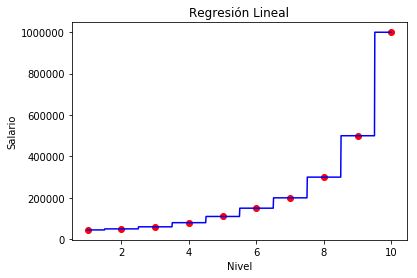

Para un nivel 6.5 cobraría  [[ 150000.]]


In [7]:
# 9. Echemos un vistazo a la pinta que tienen nuestros ajustes
# Tenemos que hacer las prediciones para cada uno de los nuevos X_grid
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(-1, 1)
y_grid = regresor.predict(X_grid)

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_grid, color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()
print('Para un nivel 6.5 cobraría ', y_pred)

In [8]:
# 10. Cálculo del error
from statsmodels.tools.eval_measures import rmse
RMSE = np.sum(rmse(y, y_fit))/len(y)
print('RMSE = ', RMSE)

RMSE =  374448.020899


# Conclusión
---
Hemos visto como los árboles de decisión establecen divisiones entre el conjunto de datos como resultado de hacer divisiones en los nodos a cada nivel de profundidad del árbol.

De esta manera cuando solicitamos por un valor, irá desviandose en cada desviación hasta terminar la rama desde el nodo raíz hasta el nodo hoja en función de las condiciones en cada nodo. Nos devolverá el resultado del nodo hoja.

Para el problema del sobreajuste, especificar parámetros en la construcción del árbol o aplicar mecanismos de *poda*